# Classification  
# Kaggle - Titanic data 

In [1]:
from numpy import *
from pylab import *
from random import *
from pandas import *
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
arr = train_data.values
n = len(arr)
print(n)

891


In [4]:
data = zeros((n,6))

In [5]:
for i in range(n):
    if arr[i,1] == 1:  # survised 
        data[i,0] = 1
    else:
        data[i,0] = -1
    data[i,1] = arr[i,2]   # class
    if arr[i,4] =="male":
        data[i,2] = -1   # male
    else:
        data[i,2] = 1    # female
    tmp = str(arr[i,5])
    if tmp == "nan":
        data[i,3] = 0 # age
    else:
        data[i,3] = arr[i,5]
    data[i,4] = arr[i,6]  # SibSp
    data[i,5] = arr[i,7]  # ParCh
    

In [6]:
print(data)

[[-1.  3. -1. 22.  1.  0.]
 [ 1.  1.  1. 38.  1.  0.]
 [ 1.  3.  1. 26.  0.  0.]
 ...
 [-1.  3.  1.  0.  1.  2.]
 [ 1.  1. -1. 26.  0.  0.]
 [-1.  3. -1. 32.  0.  0.]]


In [7]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
arr_test = test_data.values
cnt = len(arr_test)
print(cnt)

testdata = zeros((cnt,6))

418


In [9]:
for i in range(cnt):
    testdata[i,0] = arr[i,2]   # class
    if arr_test[i,3] =="male":
        testdata[i,1] = -1   # male
    else:
        testdata[i,1] = 1    # female
    tmp_test = str(arr_test[i,4])
    if tmp_test == "nan":
        testdata[i,2] = 0 # age
    else:
        testdata[i,2] = arr_test[i,4]
    testdata[i,3] = arr_test[i,5]  # SibSp
    testdata[i,4] = arr_test[i,6]  # ParCh

In [10]:
print(testdata)

[[ 3.  -1.  34.5  0.   0.   0. ]
 [ 1.   1.  47.   1.   0.   0. ]
 [ 3.  -1.  62.   0.   0.   0. ]
 ...
 [ 3.  -1.  38.5  0.   0.   0. ]
 [ 2.  -1.   0.   0.   0.   0. ]
 [ 2.  -1.   0.   1.   1.   0. ]]


In [14]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex","SibSp", "Parch"] 
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# n_estimatore:#of trees 
# max_depth : depth of trees. to avoid overfitting. default = max_depth=none (impurity=0 될 때까지 leafnode 생김..train_set 정확도 100%)
model = RandomForestClassifier(n_estimators=100, max_depth=5) 
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_prediction.csv', index=False)

In [15]:
my_prediction = pd.read_csv("my_prediction.csv")

In [16]:
print(my_prediction)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3

In [17]:
result = my_prediction.values
cnt = len(result)
print(cnt)

418


In [18]:
# 3D plot (class=c, age=a, sex=s)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

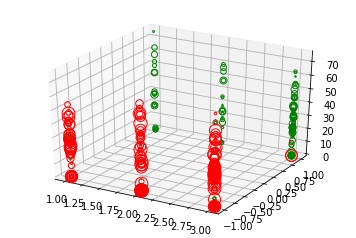

In [20]:
s1 = 0
s0 = 0
ax = plt.axes(projection ="3d")
for i in range(cnt):
    c = testdata[i,0] #class
    s = testdata[i,1] #sex
    a = testdata[i,2] #age
    if result[i,1] == 0: 
        s0 = s0 + 0.05
        ax.plot3D([c],[s],[a],'ro',markerfacecolor='none',Markersize=s0)
    else:
        s1 = s1 + 0.05
        ax.plot3D([c],[s],[a],'og',markerfacecolor='none',Markersize=s1)

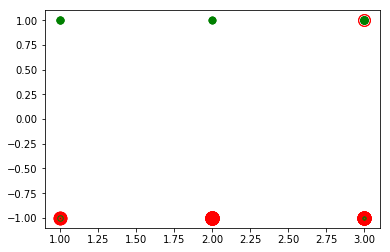

In [22]:
# plot the data in two categories - sex and pclass 
s1 = 0 
s0 = 0 
for i in range(cnt):
    c = testdata[i,0]
    s = testdata[i,1]
    if result[i,1] == 0:
        s0 = s0 + 0.05
        plot(c,s,'ro',markerfacecolor='none', MarkerSize = s0)
    else:
        s1 = s1 + 0.05
        plot(c,s,'go', markerfacecolor='none', MarkerSize = s1)